# Projeto 2
Aluno: Fabio Henrique Alves Cavaleti
NUSP: 11200550

### Instalar pacotes

Este código precisa de algumas bibliotecas para rodar.<br>
Abaixo estão os comando para sua instalação:

In [31]:
# !pip install bitstring
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install -U scikit-learn

### Código Auxiliar

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



# Questão 1

Em primeiro lugar, iremos ler os arquivos csv e criar um data frame para cada um dos conjuntos de dados.

In [33]:
train_dataset = pd.read_csv('train.csv')

train_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142399,84690.0,0.984968,0.128543,0.184937,1.111150,-0.219888,-0.848688,0.516601,-0.198159,-0.553829,...,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91,0
142400,84690.0,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,...,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
142401,84691.0,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,...,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0
142402,84691.0,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,...,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789,5.99,0


In [34]:
class_values = train_dataset['Class'].unique()
class_values

array([0, 1], dtype=int64)

## 1.a)


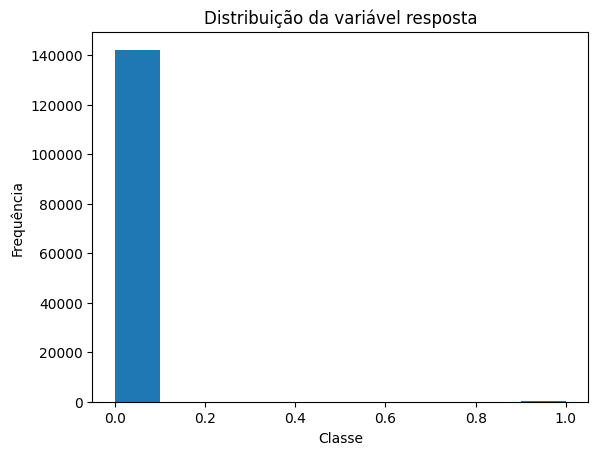

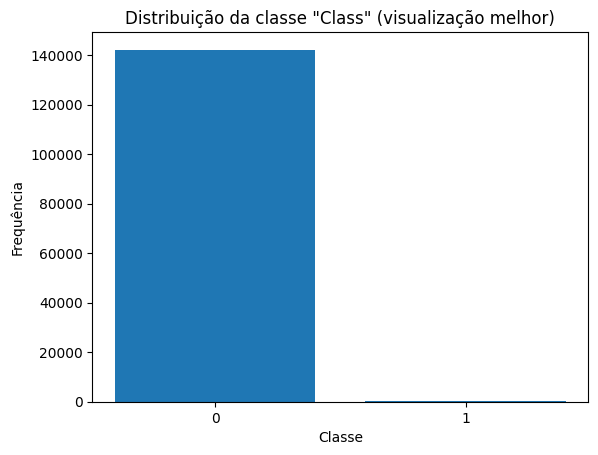

In [35]:
#Histograma
plt.hist(train_dataset['Class'])
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.title('Distribuição da variável resposta')
plt.show()

plt.hist(train_dataset['Class'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks([0, 1])
plt.title('Distribuição da classe "Class" (visualização melhor)')
plt.show()

## Conclusao
Analisando o dataset, fica evidente que a coluna **Class** apresenta apenas os valores 0 e 1. Além disso, seu nome é sugestivo, indicando que está é a variável de resposta.

O histograma nos mostra que o conjunto de dados apresenta uma quantidade muito maior de valores iguais a zero do que iguais a 1. Tendo em vista que estamos no contexto de detecção de fraude em transações financeiras, é evidente que temos uma grande quantidade de transações financeiras normais e uma pequena quantidade de transações fraudulentas. Isso está refletido em nosso histograma, com a classe 0 sendo transações não fraudulentas e a classe 1 sendo transações fraudulentas.

## 1.b)



In [36]:
# Retirando  campo Time do data set

train_dataset = train_dataset.drop('Time', axis=1)
train_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142399,0.984968,0.128543,0.184937,1.111150,-0.219888,-0.848688,0.516601,-0.198159,-0.553829,0.096242,...,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91,0
142400,-2.220505,1.004012,1.817520,0.468496,-1.543388,0.783308,-1.443050,1.759537,0.113066,-1.297413,...,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
142401,-2.280315,2.241435,-0.082290,-0.417547,-0.700328,-0.393024,-0.347291,1.247646,-0.136156,0.643005,...,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0
142402,-0.879062,0.476433,2.418721,-1.032235,-0.008689,-1.090413,0.919090,-0.466605,0.554397,-0.356330,...,-0.067034,-0.057123,0.021552,0.671743,-0.419799,-0.230648,-0.534309,-0.311789,5.99,0


### Resposta 1.b)

A coluna que contém metadados é a coluna Time. Em primeiro lugar, podemos analisar pela tabela que os valores seguem um padrão crescente, que não demonstram relação com outros valores da tabela ou nem mesmo com a classe dos dados.
Também podemos inferir pelo contexto. O campo Time é um campo muito comum em conjunto de dados com transações financeiras e indica apenas o tempo / periodo que os dados foram capturados.
Dessa forma, o campo time da tabela será retirado, pois não será necessário.

# Questão 2

## 2.a)
Em primeiro lugar, vamos implementar esses 3 modelos:

In [37]:
# Extraindo vetor de classe da tabela

gabarito_train = train_dataset['Class'].values

# Modelo aleatório
def randomClassifier(totalValues):
    result = np.random.choice([0, 1], size=totalValues, p=[0.5, 0.5])
    return result

def allFraud(totalValues):
    result = np.ones(totalValues, dtype=int)
    return result

def noFraud(totalValues):
    result = np.zeros(totalValues, dtype=int)
    return result


random_classifier_result = randomClassifier(gabarito_train.size)
all_fraud_result = allFraud(gabarito_train.size)
no_fraud_result = noFraud(gabarito_train.size)

## Agora vamos calcular a acurária e o AUC para cada um dos modelos

acc_random = accuracy_score(gabarito_train, random_classifier_result)
auc_random = roc_auc_score(gabarito_train, random_classifier_result)

acc_all_fraud = accuracy_score(gabarito_train, all_fraud_result)
auc_all_fraud = roc_auc_score(gabarito_train, all_fraud_result)

acc_no_fraud = accuracy_score(gabarito_train, no_fraud_result)
auc_no_fraud= roc_auc_score(gabarito_train, no_fraud_result)


print("Modelo aleatório:\nAcurária: " + str(acc_random) + "\nAUC: " + str(auc_random))
print("\nModelo todos fraudes:\nAcurácia: " + str(acc_all_fraud) + "\nAUC: " + str(auc_all_fraud))
print("\nModelo todos não fraudes:\nAcurácia: " + str(acc_no_fraud) + "\nAUC: " + str(auc_no_fraud))

Modelo aleatório:
Acurária: 0.49860256734361397
AUC: 0.4946619156116698

Modelo todos fraudes:
Acurácia: 0.0018889918822504986
AUC: 0.5

Modelo todos não fraudes:
Acurácia: 0.9981110081177496
AUC: 0.5


## 2.b)
A acurácia indica a proporção de predições corretas em relação ao total de previsões. No contexto de predições de transações fraudulentas, temos um conjunto de dados desbalanceados, com grande quantidades de transações não fraudulentas e um pequena quantidade de transações fraudulentas.
A acurácia se mostra ineficiente em conjunto de dados desbalanceados, pois uma alta taxa de acertos não significa que o modelo está tendo um bom desempenho. Tome por exemplo o modelo de todos os casos não fraudulentos. Este modelo apresentou um acurácia de 0.99 ou seja ele acertou quase todos os casos mesmo não conseguindo idenficar nenhuma transação fraudulenta.

Já a medida AUC é uma medida mais robusta e consegue se sair bem quando tratamos conjunto de dados desbalanceados. Ela mede a capacidade do modelo de classificar corretamente as transações fraudulentas em relação às não fraudulentas, independentemente do limiar de classificação escolhido. Podemos observar que nos 3 modelos a medida de AUC foi praticamente a mesma e mostrou que todos esses modelos não são eficientes pois apresentaram um valor baixo. Vale ressaltar que a métrica AUC possui valor máximo igual a 1 e que quanto mais próximo desse valor, melhor é o modelo.

### Conclusão
Dado os fatos descritos anteriormente, podemos concluir que **a medida AUC é mais eficiente para analisar dados desbalanceados**, tal qual o caso desse projeto e, portanto, é a melhor métrica de avaliação a ser utilizada para avaliar os modelos que iremos utilizar.


# Questão 3

## 3.a)

In [38]:
# Observação: Já temos a variável gabarito_train que é um vetor com os rótulos de todos os dados.
train_aux_df = train_dataset.drop('Class', axis=1)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 3, 4, 5]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(train_aux_df, gabarito_train)

best_params = grid_search.best_params_
best_result = grid_search.best_score_

print("Melhores hiperparâmetros: " + str(best_params))

print("Melhor resultado (AUC): " + str(best_result))


Melhores hiperparâmetros: {'max_depth': 5, 'n_estimators': 100}
Melhor resultado (AUC): 0.9673589128101902


## 3.b)

In [39]:
# Observação: Já temos a variável gabarito_train que é um vetor com os rótulos de todos os dados.
train_aux_df = train_dataset.drop('Class', axis=1)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 3, 4, 5]
}

model = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(train_aux_df, gabarito_train)

best_params_balanced = grid_search.best_params_
best_result_balanced = grid_search.best_score_

print("Melhores hiperparâmetros: " + str(best_params))

print("Melhor resultado (AUC): " + str(best_result))

## Melhores modelos
Os melhores modelos, tanto para modelos com balanceamento quanto para sem balanceamento, utilizaram - se das mesmas métricas, que foram: *n_estimators = 100* e *max_depth = 5*.

## Testando os melhores modelos na base de teste

In [ ]:
# Preparando a base de teste
test_dataset = pd.read_csv('test.csv')
test_dataset = test_dataset.drop('Time', axis=1)
test_aux_df = test_dataset.drop('Class', axis=1)
test_gabarito = test_dataset['Class'].values

# Modelo do item 3.a)
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
model.fit(train_aux_df, gabarito_train)
predicoes = model.predict(test_aux_df)

score_non_balanced = roc_auc_score(test_gabarito, predicoes)

# Modelo do item 3.b)
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=5)
model.fit(train_aux_df, gabarito_train)
predicoes = model.predict(test_aux_df)
score_balanced = roc_auc_score(test_gabarito, predicoes)

print("Score sem balanceamento: " + str(score_non_balanced))
print("Score com balanceamento: " + str(score_balanced))



Score sem balanceamento: 0.8385087557173468
Score com balanceamento: 0.8987725721264085


## Conclusão
Podemos ver que o modelo com balanceamento de pesos se saiu melhor a presentou um AUC de 0.898 o que é um valor bem aceitável. Já o modelo sem balanceamento, apresentou um valor AUC de 0.838, que apesar de ser aceitável, nao demonstrou o melhor desempenho.
O hiperparametro de pesos de classes balanceado ajusta os pesos das classes de forma inversamente proporcional às frequências delas no conjunto de dados. Como estamos trabalhando com um conjunto de dados desbalanceado, isso aumenta o peso dos casos de transações fraudulentas e isso faz com o modelo tenha um melhor desempenho na classificação de casos fraudulentos.

## Questão 4
Como o melhor modelo obtido foi aquele utilizando pesos de classe balanceado, iremos utilzá - lo para efetuar os cálculos dessa questão.

In [ ]:

model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=5)
model.fit(train_aux_df, gabarito_train)

probs = model.predict_proba(test_aux_df)

fraud_probs = probs[:, 1]

fraud_sorted_probs_idx = np.argsort(fraud_probs)[::-1] #Vetor dos indices das transações ordenadas do maior para o menor valor de probabilidades de fraude

top_1_percent_frauds_idx = fraud_sorted_probs_idx[:int(len(test_aux_df) * 0.01)]


profit = 0

for i in top_1_percent_frauds_idx:
    if(test_gabarito[i] == 1):
        profit += 100
    else:
        profit -= 2


print("O lucro obtido foi de: " + str(profit))



16532


## Conclusão
Segundo o resultado obtido, podemos concluir que houve sim lucro e portanto nosso modelo é efetivo para a detecção de transações fraudulentas.